# E-tivity 4: CE6002 Overfitting and How to Prevent It 

## Name: Martin Power
## ID      : 9939245

All necessary imports are provided. Please do not add further imports.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

Below is the exact same data you used for the regression in E-tivity 3, but this time you know exactly what function generated the data

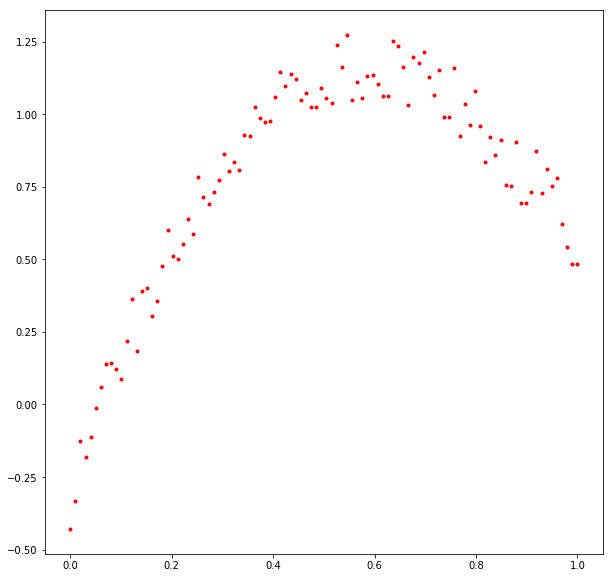

In [79]:
def target(X):
    #return: 0.5X^5-0.5X^3-4.25X^2+5.125X-0.4375
    return 0.5*((X-.5)-10*(X-.5)**2-(X-.5)**3+X**5)+1

points = 100
X = np.linspace(0, 1, points) # 100 values between 0 and 100
noise=np.random.random(points)/4
y_nf = target(X) #noise free target
y = y_nf+noise #noisy target

plt.plot(X,y,'r.')
plt.show()

Below is an implementation of linear regression with regularization

In [80]:
def weights_reg(X,y,l):
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

In [81]:
def lin_reg(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [82]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = lin_reg(w,X)
    return math.sqrt((pred-np.array(y)).dot(pred-np.array(y))/len(X))

To create higher order features:

In [74]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    ones = np.ones((X.shape[0],1))
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((ones, X.reshape(len(X),1),np.array(extra)),1)

Iterate over lambda, train the model and calculate Eout. Plot the latter versus lambda to see how much regularization is required.

In [83]:
ein=[]
eout=[]
weights=[]

# Picking 999 lambda values between 10^(lambda_exp_min) and 10^(lamda_exp_max)
# lambda_exp_max = 0 which gives a lambda max of 1
# Using np.logspace to get a non-linear spread of lambdas between 0 and 1
# Append 0 at the beginning of lambdas range to bring it up to 1000 values
lambda_exp_max = 0
lambda_exp_min = -11
lambdas = np.logspace(lambda_exp_min,lambda_exp_max,999)
lambdas = np.append([0],lambdas)

X_trans = transPoly(X,50)
# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9, random_state =5)
for l in lambdas:    
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)


# Table of Contents

#### Task 4
* [Task 4 Code](#task4)
* [Task 4.1.1 - Find Optimum Lambda](#task4_opt)
* [Task 4.1.2 - Compare Eout with and without optimum Lambda](#task4_eout)
* [Task 4.2.1 - Eout vs Lambda](#task4_lambda)
* [Task 4.2.2 - Comparison of Overfitted Model, Optimum Model and Underfitted Model](#task4_plot)

#### Task 5
* [Task 5 Code](#task5)
* [Task 5.1.1 - Find Optimum Lambda using CV](#task5_opt)
* [Task 5.1.2 - Compare Eout with and without optimum Lambda using CV](#task5_eout)
* [Task 5.2.1 - Eout vs Lambda](#task5_lambda)
* [Task 5.2.2 - Comparison of Overfitted Model, Optimum Model and Underfitted Model](#task5_plot)

#### Task 6
* [Task 6.1.1 -  Optimum Lambda using LassoCV](#task6_lassocv)
* [Task 6.1.2 -  Eout Comparison using LassoCV](#task6_lassocv_eout)
* [Task 6.2.1 -  Optimum Lambda using RidgeCV](#task6_ridgecv)
* [Task 6.2.2 -  Eout Comparison using RidgeCV](#task6_ridgecv_eout)
* [Task 6.3.1 -  Comparison of Weights Obtained using LassoCV and RidgeCV](#task6_comp)

<a id='task4'></a>

# Task 4

<a id='task4_opt'></a>

## Task 4.1.1 - Find Optimum Lambda
* Choosing optimum lambda to be the value of lambda that minimizes the out-of-sample error, Eout

In [165]:
opt_lambda =  lambdas[np.argmin(eout)]
print("Optimum Lambda is:\t",opt_lambda)

Optimum Lambda is:	 0.00509817606442043


<a id='task4_eout'></a>

## Task 4.1.2 - Compare Eout with and without optimum Lambda
* The Eout obtained with regularisation is signicantly smaller than the Eout obtained without regularisation
* The diagram below plots Yhat for model with regularisation and without regularisation
* Clearly from the diagram, the model with regularisation closely follows ytest while the model without
  regularisation significantly diverges, indicating either a bad approximation to the training data or 
  overfitting the training data

In [166]:
print("\nWith regularisation (lambda=",lambdas[np.argmin(eout)],")")
print("Eout value for Optimum Lambda is :\t",eout[np.argmin(eout)])
print("Ein  value for Optimum Lambda is :\t",ein[np.argmin(eout)])

print("\nWithout regularisation (lambda=0)")
print("Eout value without regularisation is :\t",eout[0])
print("Ein  value without regularisation is :\t",ein[0])


With regularisation (lambda= 0.00509817606442043 )
Eout value for Optimum Lambda is :	 0.05265912757296462
Ein  value for Optimum Lambda is :	 0.07387184900949045

Without regularisation (lambda=0)
Eout value without regularisation is :	 3.4820593100863793
Ein  value without regularisation is :	 3.3325618171272033


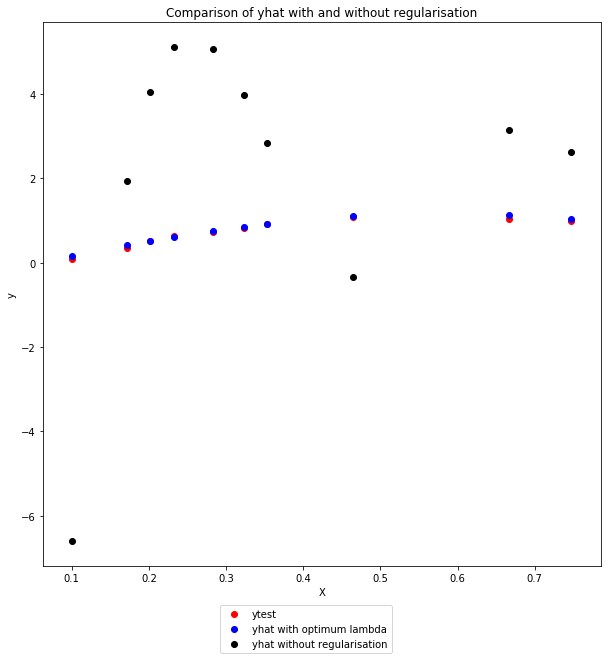

In [176]:
# Calculatate yhat using optimum Lambda
yhat_opt = lin_reg(weights[np.argmin(eout)],X_test)

# Calculate yhat without regularisation
yhat_wo_reg = lin_reg(weights[0],X_test)

plt.title("Comparison of yhat with and without regularisation")
plt.scatter(X_test[:,1],y_test, color='r', label = 'ytest')
plt.scatter(X_test[:,1],yhat_opt,color='b',label = 'yhat with optimum lambda')
plt.scatter(X_test[:,1],yhat_wo_reg, color='k',label = 'yhat without regularisation')
plt.figlegend(loc="lower center")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


<a id='task4_lambda'></a>

## Task 4.2.1 - Eout vs Lambda
* The plot below shows Eout verus Lamba in range [0,1]
* To the right of the optimum lambda, the model starts to underfit and both Ein and Eout increase
* To the left of the optimim lambda, we can see that Ein continues to drop but Eout increases indicating the model is overfitting

**NOTE:** Re-running the notebook may slightly change the appearance of the plot but the analysis above applies in general

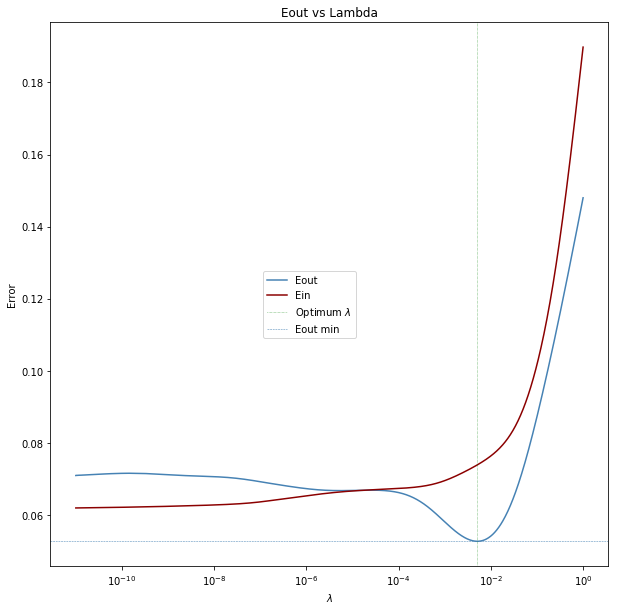

In [261]:
# Plot Eout and Ein 
plt.rcParams["figure.figsize"] = (10, 10) 
plt.title("Eout vs Lambda")
plt.plot(lambdas[1:], eout[1:], color='steelblue', label='Eout') 
plt.plot(lambdas[1:], ein[1:],  color='darkred', label='Ein') 
#plt.legend(loc="lower right")

#plt.yscale('log')
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Error')
plt.axvline(x=opt_lambda, linewidth=0.5, color='g',linestyle='dotted', label = 'Optimum $\lambda$')
plt.axhline(y=eout[np.argmin(eout)], linewidth=0.5, color='steelblue', linestyle='dashed', label = 'Eout min')
plt.figlegend(loc="center")
plt.show()


<a id='task4_plot'></a>

## Task 4.2.2 - Comparison of Overfitted Model, Optimum Model and Underfitted Model
The following plots show overfitted, underfitted and optimum models
* The overfitted model uses $\lambda$ = 0 which in effect is using no regularisation
  * This model produced a function that clearly does not match the target function


* The underfitted model uses $\lambda$ = 1 which hinders the model from learning the target function
    * This model produced a function that struggles to fully approximate the target function
    
    
* The optimum model uses the $\lambda$ value that delivered the lowest Eout in the prevous experiment
    * This model produced a function that reasonably approximates the target function

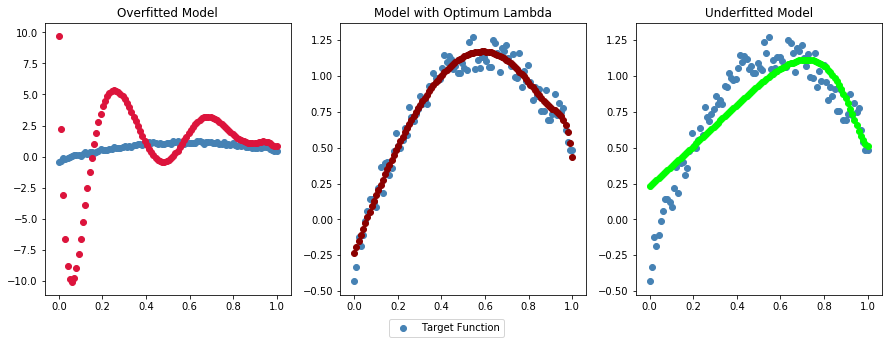

In [169]:
# Plot with 1 Row and 3 Columns
plt.subplots(1, 3, figsize=(15, 5))

# Overfitted Model
# Lambda= 0
plt.subplot(1,3,1)
plt.title("Overfitted Model")
plt.scatter(X_trans[:,1], y, color='steelblue', label='Target Function') 
plt.scatter(X_trans[:,1],lin_reg(weights[0],X_trans), color='crimson') 

# Model with Optimum Lambda
plt.subplot(1,3,2)
plt.title("Model with Optimum Lambda")
plt.scatter(X_trans[:,1], y, color='steelblue') 
plt.scatter(X_trans[:,1],lin_reg(weights[np.argmin(eout)],X_trans), color='darkred') 

# Underfitted Model
# Lambda= 1
plt.subplot(1,3,3)
plt.title("Underfitted Model")
plt.scatter(X_trans[:,1], y, color='steelblue')
plt.scatter(X_trans[:,1],lin_reg(weights[999],X_trans), color='lime')

# Plot graphs
plt.figlegend(loc="lower center")
plt.show()
    

<a id='task5'></a>

# Task 5

<a id='task5_opt'></a>

## Task 5.1.1 - Find Optimum Lambda using CV
* In KFold(), shuffle is set to "True" so that each fold will contain a mix of data from all regions betwen 0 and 1
* If shuffle was left to "False", then then each fold would be a continuous segment along the X-axis and would only learn that portion of the target function instead of trying to learn the function between [0,1]
* During this experiment I am only calculating Eout which is divided by the number of folds to deliver an average Eout value for each value of $\lambda$

In [262]:
# Set folds
folds = 10

# Create empty array to store average Eout values (also called Eval in Pep's Q&A session)
eout_cv=np.zeros(lambdas.shape[0])

cv = KFold(n_splits=folds, shuffle=True, random_state=0)

for train, test in cv.split(X_trans, y):
    for i, l in enumerate(lambdas):     
        w = weights_reg(X_trans[train],y[train],l)
        eout_cv[i]+=(calc_error(w,X_trans[test],y[test]))/folds


In [263]:
# Determine optimum lambda from CV experiment and compare with Non-CV value

opt_cv_lambda =  lambdas[np.argmin(eout_cv)]
print("Optimum CV Lambda is:    \t",opt_cv_lambda)
print("Optimum Non-CV Lambda is:\t",opt_lambda)

Optimum CV Lambda is:    	 3.0266480593956952e-05
Optimum Non-CV Lambda is:	 0.00509817606442043


<a id='task5_eout'></a>

## Task 5.1.2 - Compare Eout with and without optimum Lambda using CV

In [264]:
print("\nWithout regularisation ")
print("Eout value for Optimum Lambda is     :\t",eout[np.argmin(eout)])
print("Eout (CV)value for Optimum Lambda is :\t",eout_cv[np.argmin(eout_cv)])

print("\nWithout regularisation (lambda=0)")
print("Eout value without regularisation is      :\t",eout[0])
print("Eout (CV) value without regularisation is :\t",eout_cv[0])


Without regularisation 
Eout value for Optimum Lambda is     :	 0.05265912757296462
Eout (CV)value for Optimum Lambda is :	 0.07191906047509761

Without regularisation (lambda=0)
Eout value without regularisation is      :	 3.4820593100863793
Eout (CV) value without regularisation is :	 4.863864300400193


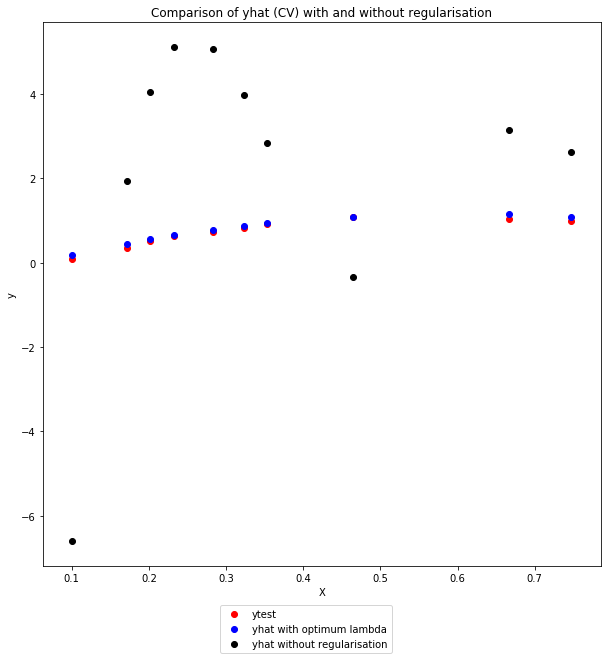

In [175]:
# Calculatate weights using optimum lambda found using CV
# Note : Using original train set for this
w_cv = weights_reg(X_train,y_train,opt_cv_lambda)

# Calculatate yhat using optimum Lambda
yhat_cv_opt = lin_reg(w_cv,X_test)

# Calculate yhat without regularisation
# Use lambda=0 for non-CV run as it will be practically equivalent
yhat_wo_reg = lin_reg(weights[0],X_test)

plt.title("Comparison of yhat (CV) with and without regularisation")
plt.scatter(X_test[:,1],y_test, color='r', label = 'ytest')
plt.scatter(X_test[:,1],yhat_cv_opt,color='b',label = 'yhat with optimum lambda')
plt.scatter(X_test[:,1],yhat_wo_reg, color='k',label = 'yhat without regularisation')
plt.figlegend(loc="lower center")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

<a id='task5_lambda'></a>

## Task 5.2.1 - Eout vs Lambda using CV
* The plot below shows the average Eout values obtained during the CV experiment
* For comparison I have also plotted the Eout values from the non-CV run
* The CV Eout values are slightly higher which could be down to the test set being taken from different folds each time and may actually be a more representative value and indicate how well a given hypothesis will generalise to out-of-sample

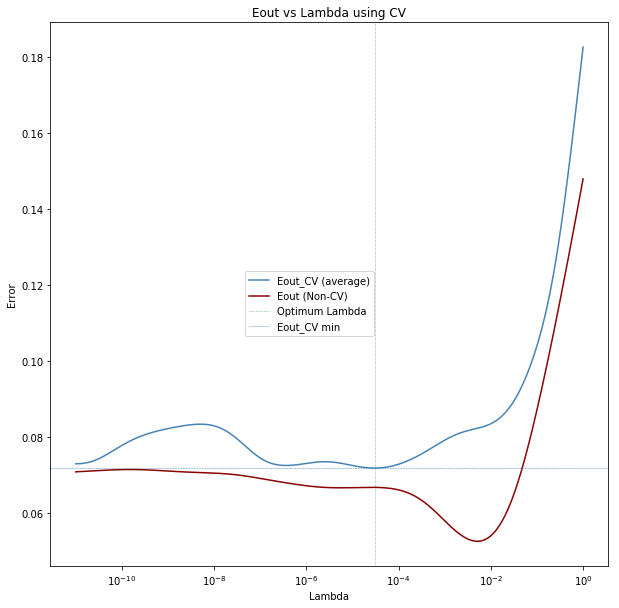

In [266]:
# Plot Eout and Ein 
plt.rcParams["figure.figsize"] = (10, 10) 
plt.title("Eout vs Lambda using CV")
plt.plot(lambdas[1:], eout_cv[1:], color='steelblue', label='Eout_CV (average)') 
plt.plot(lambdas[1:], eout[1:],  color='darkred', label='Eout (Non-CV)') 
#plt.legend(loc="lower right")

#plt.yscale('log')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.axvline(x=opt_cv_lambda, linewidth=0.5, color='g',linestyle='dotted', label = 'Optimum Lambda')
plt.axhline(y=eout_cv[np.argmin(eout_cv)], linewidth=0.5, color='steelblue', linestyle='dashed', label = 'Eout_CV min')
plt.figlegend(loc="center")
plt.show()

<a id='task5_plot'></a>

## Task 5.2.2 - Comparison of Overfitted Model, Optimum Model and Underfitted Model using CV
* Results here are similar to the non-CV run

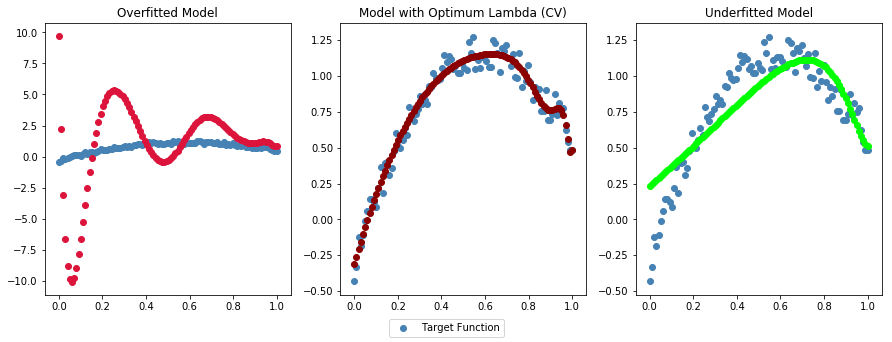

In [178]:
# Plot with 1 Row and 3 Columns
plt.subplots(1, 3, figsize=(15, 5))

# Overfitted Model
# Lambda= 0 (Reuse weights from non-CV run)
plt.subplot(1,3,1)
plt.title("Overfitted Model")
plt.scatter(X_trans[:,1], y, color='steelblue', label='Target Function') 
plt.scatter(X_trans[:,1],lin_reg(weights[0],X_trans), color='crimson') 

# Model with Optimum Lambda
# Use weights from CV run
plt.subplot(1,3,2)
plt.title("Model with Optimum Lambda (CV)")
plt.scatter(X_trans[:,1], y, color='steelblue') 
plt.scatter(X_trans[:,1],lin_reg(w_cv,X_trans), color='darkred') 

# Underfitted Model
# Lambda= 1 (Reuse weights from non-CV run)
plt.subplot(1,3,3)
plt.title("Underfitted Model")
plt.scatter(X_trans[:,1], y, color='steelblue')
plt.scatter(X_trans[:,1],lin_reg(weights[999],X_trans), color='lime')

# Plot graphs
plt.figlegend(loc="lower center")
plt.show()

<a id='task6'></a>

# Task 6

In [179]:
# Add function to calculate error from Lasso and Ridge regression
def calc_pred_error(y,yhat):
    # Adapted from earlier function
    # Calculate the error as the mean squared error
    return math.sqrt((np.array(yhat)-np.array(y)).dot(np.array(yhat)-np.array(y))/len(y))

<a id='task6_lassocv'></a>

## Task 6.1.1 -  Optimum Lambda using LassoCV

I did two runs of Lasso due to the behaviour I was seeing with the resulting weights. On my first Lasso run where I used the same lambda values as the Linear and LinearCV models, I was only seeing 5 of the 51 weights being pushed to zero --> This raised some suspiscion.

Details are in the summary section at the end

In [267]:
# Turn off warnings about convergence being printed
# while running Lasso
import warnings;
warnings.filterwarnings('ignore')

lcv = LassoCV(n_alphas = len(lambdas), alphas=lambdas, cv=folds, random_state=0, max_iter=10000, n_jobs=-1)
#lcv = LassoCV(n_alphas = len(lambdas), cv=folds)

lcv.fit(X_trans, y)

LassoCV(alphas=array([0.0000e+00, 1.0000e-11, ..., 9.7494e-01, 1.0000e+00]),
    copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=10000,
    n_alphas=1000, n_jobs=-1, normalize=False, positive=False,
    precompute='auto', random_state=0, selection='cyclic', tol=0.0001,
    verbose=False)

In [268]:
lambda_lasso = lcv.alpha_

y_hat_lcv_test  = lcv.predict(X_trans)

eout_lcv = calc_pred_error(y,y_hat_lcv_test)

print("LassoCV Lamba : \t",lambda_lasso)
print("LassoCV Eout  : \t",eout_lcv)

LassoCV Lamba : 	 5.08642711399262e-07
LassoCV Eout  : 	 0.06811591721721535


In [276]:
# Running a second iteration of Lasso where only the number of alphas
# and not the actual alphas is specified
lcv2 = LassoCV(n_alphas = len(lambdas), cv=folds,random_state=0, max_iter=10000, n_jobs=-1)

lcv2.fit(X_trans, y)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=10000, n_alphas=1000, n_jobs=-1, normalize=False,
    positive=False, precompute='auto', random_state=0, selection='cyclic',
    tol=0.0001, verbose=False)

In [277]:
lambda_lasso2 = lcv2.alpha_

y_hat_lcv_test2  = lcv2.predict(X_trans)

eout_lcv2 = calc_pred_error(y,y_hat_lcv_test2)

print("LassoCV2 Lamba : \t",lambda_lasso2)
print("LassoCV2 Eout  : \t",eout_lcv2)

LassoCV2 Lamba : 	 9.959161984252875e-05
LassoCV2 Eout  : 	 0.07076270087269988


<a id='task6_lassocv_eout'></a>

## Task 6.1.2 -  Eout Comparison using LassoCV

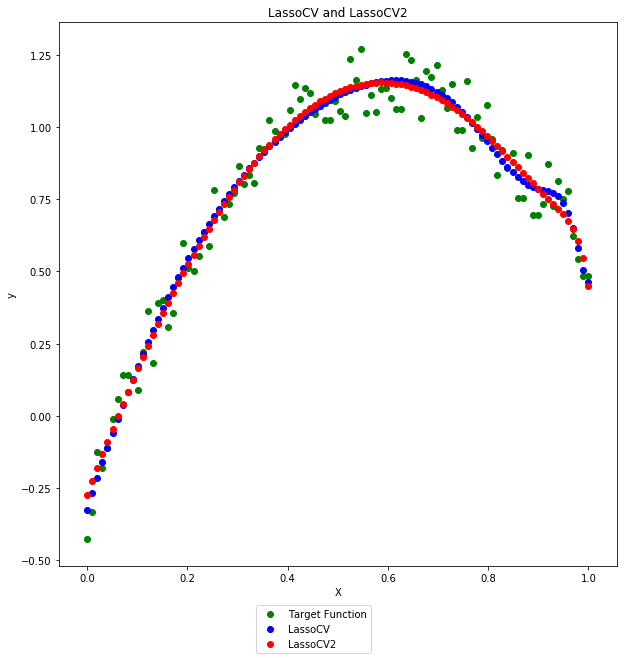

In [329]:
plt.title("LassoCV and LassoCV2")
plt.scatter(X_trans[:,1],y, color='g', label = 'Target Function')
plt.scatter(X_trans[:,1],y_hat_lcv_test, color='b',label = 'LassoCV')
plt.scatter(X_trans[:,1],y_hat_lcv_test2, color='r',label = 'LassoCV2')
plt.figlegend(loc="lower center")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

<a id='task6_ridgecv'></a>

## Task 6.2.1 -  Optimum Lambda using RidgeCV

In [270]:
rcv = RidgeCV(alphas=lambdas[1:], cv=folds)

rcv.fit(X_trans, y)

RidgeCV(alphas=array([1.0000e-11, 1.0257e-11, ..., 9.7494e-01, 1.0000e+00]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [271]:
lambda_ridge = rcv.alpha_

y_hat_rcv_test  = rcv.predict(X_trans)

eout_rcv = calc_pred_error(y,y_hat_rcv_test)

print("RidgeCV Lamba : \t",lambda_ridge)
print("RidgeCV Eout  : \t",eout_rcv)

RidgeCV Lamba : 	 0.0003206358095769824
RidgeCV Eout  : 	 0.06737973356004194


<a id='task6_ridgecv_eout'></a>

## Task 6.2.2 -  Eout Comparison using RidgeCV

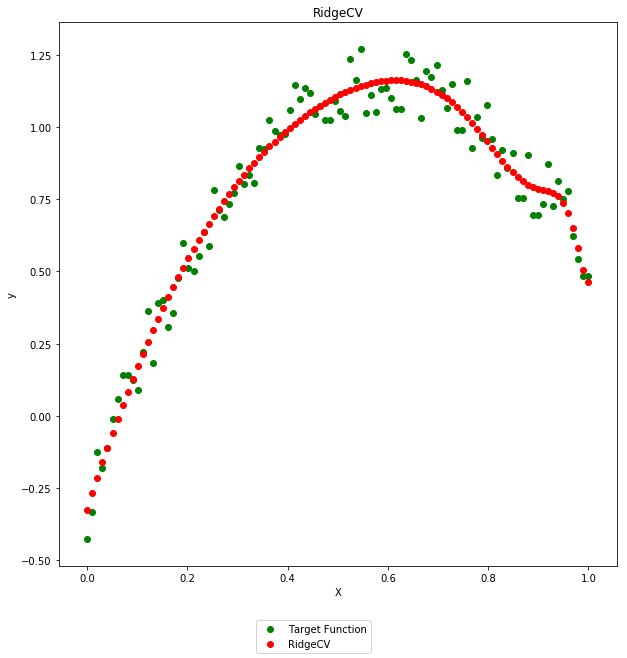

In [330]:
plt.title("RidgeCV")
plt.scatter(X_trans[:,1],y, color='g', label = 'Target Function')
plt.scatter(X_trans[:,1],y_hat_lcv_test, color='r',label = 'RidgeCV')
plt.figlegend(loc="lower center")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

## Task 6.3.1 -  Comparison of Models

    ************************************
    Comparison of Models
    ************************************
    Linear   Model	Eout:0.05266	Lambda:0.0050982
    LinearCV Model	Eout:0.07192	Lambda:0.0000303
    LassoCV  Model	Eout:0.06812	Lambda:0.0000005
    LassoCV2 Model	Eout:0.07076	Lambda:0.0000996
    RidgeCV  Model	Eout:0.06738	Lambda:0.0003206
    
On first glance, the initial Linear model provides the best performance with an Eout of 0.052 on the test set. However, I believe this to be a bit lucky as the test set only contains 10 elements and a given hypothesis could produce a good Eout value on 10 elements but fail to maintain this performance and generalise to the full set. When I tests this weight set across the entire dataset, the Eout value rose to 0.07203223889445223. This is a better indicator of the performance of this model and would indicate it is the worst performing model although not substantially so.

Using Cross Validation, the performance of the Linear model only improves slightly. However, from looking at the other models, an Eout value in the range of 0.07 seems to be in the range of the upper bound of performance.

LassoCV2 hits this 0.07 value and uses only 9 coeffecients in comparison to the 51 used by the Linear and LinearCV model. This is similar performance delivered with a much smaller VC dimension.

The LassoCV model uses a much smaller lambda than LassoCV2 and did not penalise the weight coefficients as much as LassoCV2 which meant it had 46 non-zero weights. This is a 5x increase in the number of coefficients and also significantly increases the VC dimension and only delivers and Eout improvement of less than 0.002. Therefore I would consider this LassoCV model to be inferior to LassoCV2. Although LassoCV2 has slightly higher Eout I would expect it to generalise better to the target function on a consistent basis.

RidgeCV delivers the best performance overall but again uses 50 coefficients versus the 9 coefficients of LassoCV2. According to Chris Albon's *Machine Learning with Python Cookbook*, as a rule of thumb one would expect ridge regression to often produce slightly better predictions than Lasso regression. The results here align with this rule of thumb. However, in the book, he also states that Lasso tends to produce *more interpretable models*. I assume this is due to having fewer weights/coefficients which makes it easier to interpret which values are significantly contributing to the output results.

Therefore, I would still consider LassoCV2 to be the best model when all things are considered



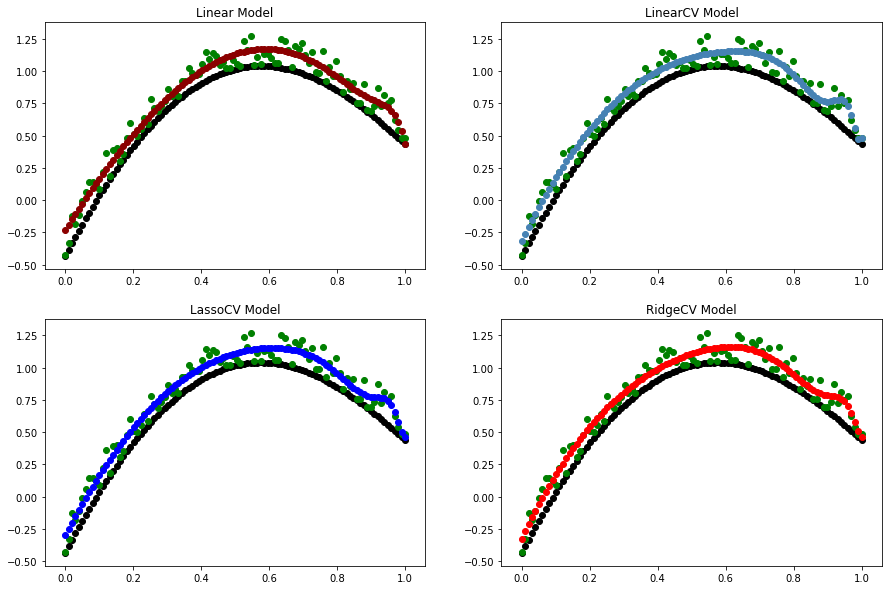

In [273]:
# Plot with 2 Row and 2 Columns
plt.subplots(2, 2, figsize=(15, 10))

# Linear Model
plt.subplot(2,2,1)
plt.title("Linear Model")
plt.scatter(X_trans[:,1],y_nf, color='k', label = 'Y (Noise Free)')
plt.scatter(X_trans[:,1],y, color='g', label = 'Y (Noisy)')
plt.scatter(X_trans[:,1],lin_reg(weights[np.argmin(eout)],X_trans), color='darkred',label='Linear') 

# LinearCV Model
plt.subplot(2,2,2)
plt.title("LinearCV Model")
plt.scatter(X_trans[:,1],y_nf, color='k', label = 'Y (Noise Free)')
plt.scatter(X_trans[:,1],y, color='g', label = 'Y (Noisy)')
plt.scatter(X_trans[:,1],lin_reg(w_cv,X_trans), color='steelblue',label='LinearCV') 

# LassoCV Model
plt.subplot(2,2,3)
plt.title("LassoCV Model")
plt.scatter(X_trans[:,1],y_nf, color='k', label = 'Y (Noise Free)')
plt.scatter(X_trans[:,1],y, color='g', label = 'Y (Noisy)')
plt.scatter(X_trans[:,1],y_hat_rcv_test, color='b',label = 'LassoCV')
            
# RidgeCV Model
plt.subplot(2,2,4)
plt.title("RidgeCV Model")
plt.scatter(X_trans[:,1],y_nf, color='k', label = 'Y (Noise Free)')
plt.scatter(X_trans[:,1],y, color='g', label = 'Y (Noisy)')
plt.scatter(X_trans[:,1],y_hat_lcv_test, color='r',label = 'RidgeCV')

# Plot graphs
#plt.figlegend(loc="lower center")
plt.show()

In [280]:
print("************************************")
print("Comparison of Models")
print("************************************")
print(f"Linear   Model\tEout:{eout[np.argmin(eout)]:06.5f}\tLambda:{lambdas[np.argmin(eout)]:08.7f}")
print(f"LinearCV Model\tEout:{eout_cv[np.argmin(eout_cv)]:06.5f}\tLambda:{lambdas[np.argmin(eout_cv)]:08.7f}")
print(f"LassoCV  Model\tEout:{eout_lcv:06.5f}\tLambda:{lambda_lasso:08.7f}")
print(f"LassoCV2 Model\tEout:{eout_lcv2:06.5f}\tLambda:{lambda_lasso2:08.7f}")
print(f"RidgeCV  Model\tEout:{eout_rcv:06.5f}\tLambda:{lambda_ridge:08.7f}")

************************************
Comparison of Models
************************************
Linear   Model	Eout:0.05266	Lambda:0.0050982
LinearCV Model	Eout:0.07192	Lambda:0.0000303
LassoCV  Model	Eout:0.06812	Lambda:0.0000005
LassoCV2 Model	Eout:0.07076	Lambda:0.0000996
RidgeCV  Model	Eout:0.06738	Lambda:0.0003206


<a id='task6_comp'></a>

## Task 6.3.1 -  Comparison of Weights Obtained using LassoCV and RidgeCV

For the sake of analysis, I have pasted my Eout and Lambda values for the various models below as these values vary run to run.

    ************************************
    Comparison of Models
    ************************************
    Linear   Model	Eout:0.05266	Lambda:0.0050982
    LinearCV Model	Eout:0.07192	Lambda:0.0000303
    LassoCV  Model	Eout:0.06812	Lambda:0.0000005
    LassoCV2 Model	Eout:0.07076	Lambda:0.0000996
    RidgeCV  Model	Eout:0.06738	Lambda:0.0003206

    **************************************************
    Comparison of Number of Non-Zero Weights from Lasso and Ridge Models
    **************************************************
    Total Number of Weights =  51
    Total Number of Non-Zero Weights for LinearCV =  51
    Total Number of Non-Zero Weights for RidgeCV =  50
    Total Number of Non-Zero Weights for LassoCV =  46
    Total Number of Non-Zero Weights for LassoCV2 =  9


#### Comparison of Lasso and Ridge Coefficients (and Lasso2 Coefficients)

I did two runs of Lasso due to the behaviour I was seeing with the resulting weights. On my first Lasso run where I used the same lambda values as the Linear and LinearCV models, I was only seeing 5 of the 51 weights being pushed to zero --> This raised some suspiscion.

I repated a second run (marked as LassoCV2) where I used all the same settings as the first LassoCV run except I did not supply the lamba values and instead only supplie the number of lambdas (or alphas in Lasso terminology to use) and this time around 46 of the 51 weight went to a zero value which is what would typically happen for a Lasso regression.

This should be contrasted with the Ridge regression where only one weight value went to 0 and the Linear models were no weights went to zero.

#### Why did this happen?

My theory is that when I supplied the values, I allowed alphas go all the way down to 10^-11 whereas when the Lasso algorithm supplied the values it only allowed the values to go down to 6.62x10^-5 (according to np.min(lcv2.alphas_)). My alpha values allowed Eout values to be calculated where only a small penalty was being applied to the weights and the CV algorithm was selecting these runs as the most "optimal" as they delivered the best performance.

However, you can see that an Eout improvement of ~0.002 between LassoCV and LassoCV2 required an extra 37 weights and dropped the Lambda coefficient from 0.0000996 to 0.0000005

When plotted, LassoCV2 "follows the noise" less than LassoCV and would appear to be a better model with fewer coefficients

#### Is this expected?

It is expected that Lasso pushes weight coefficients to 0 as it uses L1 regularisation (absolute value of weights) versus the L2 regulariation that Ridge uses. I liked the explanation given at https://www.quora.com/Whats-a-good-way-to-provide-intuition-as-to-why-the-lasso-L1-regularization-results-in-sparse-weight-vectorsfor this. L2 regularization penalizes the square of weights. and therefore cares a lot more about pushing down big weights than tiny ones. The "force" pushing small weights to 0 is very small. In contrast, L1 regularization penalizes their absolute value and  is as happy to make big weights a bit smaller as to make small weights a bit smaller. In comparison to L2, L1 tends far more to drive small weights to 0

#### Comparison of Lasso and Ridge Lambda Values

For this comparison, I will focus on LassoCV2 and compare to RidgeCV. The Eout values were very similar (0.07076 for LassoCV2 versus 0.06738 for RidgeCV). However there is a 3.2x difference in the Lambda values (0.0000996 for LassoCV2 versus 0.0003206 for RidgeCV). For similar performance, it is expected that the Lasso lambda is larger as it only penalizes the absolute value of the weights where Ridge penalised the square of the weights. Therefore, Ridge needs a larger lambda value to minimise this penalty

#### Summary
* LassoCV2 reduced majority of weights to zero and RidgeCV did not have this behaviour **-->** This is expected
* Ridge had a large value of lambda (or alpha) **-->** This is expected


In [295]:
# Add function to count non-zero elements in a list
def count_non_zero_elements(n):
    cnt = 0
    for i in range(len(n)):
        # Approximate anything greater than 10e-4 as non-zero
        if(abs(n[i])>0.0001):
            cnt+=1
    return cnt

In [297]:
print("**************************************************")
print("Comparison of Weights from Lasso and Ridge Models")
print("**************************************************")
print(f"      \t  \tLasso2\tLasso\tRidge")
for i in range(len(lcv.coef_)):
    print(f"Weight\t{i:2}\t{lcv2.coef_[i]:05.3f}\t{lcv.coef_[i]:05.3f}\t{rcv.coef_[i]:05.3f}")

    
print("\n\n**************************************************")
print("Comparison of Number of Non-Zero Weights from Lasso and Ridge Models")
print("**************************************************")    
print("Total Number of Weights = ",len(lcv2.coef_))
print("Total Number of Non-Zero Weights for LinearCV = ",count_non_zero_elements(w_cv))
print("Total Number of Non-Zero Weights for RidgeCV = ",count_non_zero_elements(rcv.coef_))
print("Total Number of Non-Zero Weights for LassoCV = ",count_non_zero_elements(lcv.coef_))
print("Total Number of Non-Zero Weights for LassoCV2 = ",count_non_zero_elements(lcv2.coef_))


**************************************************
Comparison of Weights from Lasso and Ridge Models
**************************************************
      	  	Lasso2	Lasso	Ridge
Weight	 0	0.000	0.000	0.000
Weight	 1	4.701	5.592	5.040
Weight	 2	-3.586	-6.814	-4.231
Weight	 3	-0.473	2.042	-1.004
Weight	 4	-0.000	1.623	0.546
Weight	 5	-0.000	0.385	1.062
Weight	 6	-0.000	-0.602	0.834
Weight	 7	0.000	-1.230	0.234
Weight	 8	0.000	-1.274	-0.398
Weight	 9	0.000	-1.007	-0.858
Weight	10	0.000	-0.600	-1.073
Weight	11	0.000	-0.208	-1.058
Weight	12	0.000	0.087	-0.869
Weight	13	0.040	0.540	-0.572
Weight	14	0.277	0.741	-0.227
Weight	15	0.025	0.849	0.118
Weight	16	0.000	0.875	0.429
Weight	17	0.000	0.838	0.686
Weight	18	0.000	0.752	0.876
Weight	19	0.000	0.634	0.996
Weight	20	0.000	0.496	1.050
Weight	21	0.000	0.348	1.041
Weight	22	0.000	0.206	0.979
Weight	23	0.000	0.082	0.872
Weight	24	0.000	0.010	0.730
Weight	25	0.000	0.000	0.562
Weight	26	0.000	-0.150	0.377
Weight	27	0.000	-0.373	0.183
Weight	28	-0